# Welcome to the AMIDR/AMID Analysis Notebook!

This notebook allows easy analysis of AMIDR/AMID data (from Dal and Novonix UHPC files or Biologic files converted into UHPC format) with flexibility for naming files and creating directories.

The text preceeding each cell gives some information on the arguments that can be supplied to the function calls.

To run a block press "shift+enter". All blocks with text, like this one, can be run or skipped over.

The next block is used to load up the AMIDR/AMID program.

In [1]:
from amidr import AMIDR
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

### Biologic Pre-processing (Optional for AMIDR)

Biologic files must first be pre-processed to generate UHPC format files capable of being read by AMIDR. Check the second plot to ensure that there is strong OCV agreement between charge and discharge. Poor agreement suggests substantial side reactions which will introduce error to the measured diffusivity values. Please ignore this section if using UHPC files. Biologic is not a recommended cell tester for performing AMID.

>**path**: The location on your computer where the Biologic files are located and where the UHPC format files will be placed. No matter which operating system (Win, Mac, Linux), use the "/" for separating directories - differences between operating systems are handled internally. On Windows, it is recommended to start with "C:" but if not, then the directory where this notebook is located is used as base.

>**form_files/d_files/c_files**: The names of the formation, discharge, and charge biologic files. Be sure to list them in chronological order and include the .mpt file extension.

>**name**: The name of the cell being measured. Feel free to include information such as material and temperature.

>**export_fig**: Whether or not to save figure showing complete cell activity. <br> *Default is True*

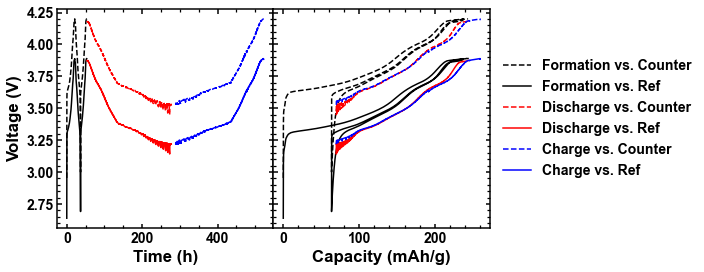

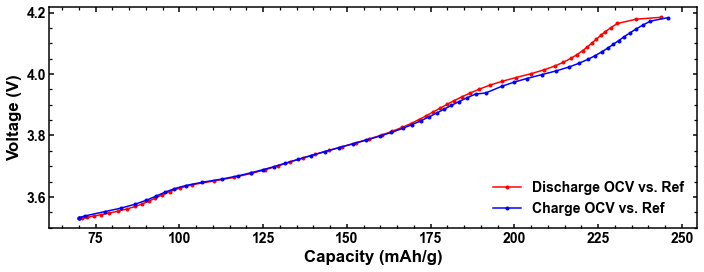

In [2]:
from amidr import BIOCONVERT

path = 'C:/Users/Mitch/Lab/Atlung Modeling/Biologic Data/270'
form_files = ['270_230530_C02.mpt']
d_files = ['270_230602_D4,2-3,95V_C02.mpt', '270_230604_D3,95-3,7V_C02.mpt', '270_230606_D3,7-3,45V_C02.mpt']
c_files = ['270_230612_C3,5-3,7V_C02.mpt', '270_230619_C3,7-3,95V_C02.mpt', '270_230623_C3,95-4,2V_C02.mpt']
name = '270 NM9505 30C'

BIOCONVERT(path, form_files, d_files, c_files, name)

### Directory structure

The location of the files to analyze and where the processed data and figures should be saved must first be decided.

>**srcpath**: The location on your computer (or remote server if connected via VPN) where the UHPC format AMIDR/AMID file is located. No matter which operating system (Win, Mac, Linux), use the "/" for separating directories - differences between operating systems are handled internally. On Windows, it is recommended to start with "C:" but if not, then the directory where this notebook is located is used as base.

>**dstpath**: The location on your computer that will serve as the base directory to save things. Feel free to make the srcpath and dstpath the same location.

>**uhpc_file**: The name of the AMIDR/AMID UHPC file. Be sure to include the .csv file extension.

>**cell_label**: All processed data and figures will be sent into a folder of this name, "\[dstpath\]\\\[cell_label\]", and include this label in their file names. Feel free to make the uhpc_file and cell_label the same name (without the .csv extension).

In [3]:
dstpath = 'C:/Users/Mitch/Lab/Atlung Modeling/Biologic Data/270'
srcpath = 'C:/Users/Mitch/Lab/Atlung Modeling/Biologic Data/270'
uhpc_file = '270 NM9505 30C Discharge.csv'
cell_label = '270 NM9505 30C Discharge'

### The AMIDR/AMID Object

Instantiating the AMIDR/AMID object is easy! The resulting object (in this case *amidr_data*) contains parsed and evaluated data from the AMIDR/AMID dataset. You should read the output to be sure it is giving the information you expect!

>**single_pulse**: Whether the data file being read comes from an AMIDR *(True)* or AMID *(False)* protocol. Parsing will fail if not selected correctly.

#### [Optional Arguments (Advanced)](#The-AMIDR/AMID-Object-Optional-Arguments:)

In [55]:
amidr_data = AMIDR(dstpath, srcpath, uhpc_file, cell_label, single_pulse=True)

Working on cell: 270 NM9505 30C
Positive electrode active mass: 0.002157 g
Input cell capacity: 0.00048499999999999997 Ah
3-electrode data detected. Using working potential for calculations and complete potential for graphs and labels.
First signature curve step: 1
Last signature curve step: 177
Specific Capacity achieved in advanced protocol (signature curves): 173.69 mAh/g
Using 0.00048500 Ah to compute rates.
Starting voltage: 4.184 V
Ending voltage: 3.455 V
Found 59 charge or discharge steps in sig curve sequences.
Found 59 signature curves.
Midpoint capacities: [  -3.627  -10.063  -13.847  -15.663  -17.187  -18.56   -19.875  -21.199
  -22.592  -24.131  -25.866  -27.893  -30.279  -33.188  -36.709  -40.874
  -45.207  -49.151  -52.589  -55.443  -57.968  -60.378  -62.654  -64.812
  -66.903  -68.99   -71.129  -73.396  -75.863  -78.622  -81.707  -85.165
  -88.932  -92.924  -96.976 -100.974 -104.859 -108.631 -112.358 -116.157
 -120.174 -124.743 -130.29  -136.493 -141.642 -145.061 -147.66

### Pre-fitting Plots

Now that the data is parsed and evaluated the standard plots can be produced. plot_protocol plots the entire protocol being analyzed. plot_caps plots pulses/intervals individually. The plots should be examined to ensure your test data is being parsed and evaluated correctly.

>**export_fig**: Whether to save the following plots. All figures get saved in the directory \[dstpath\]\\\[cell_label\]. <br> *Default is True*

>**ylims**: Optional argument to fix y-axis plot bounds. A list with the min and max values for the y-axis bounds. <br> *e.g., ylims=[2.95, 4.35]*

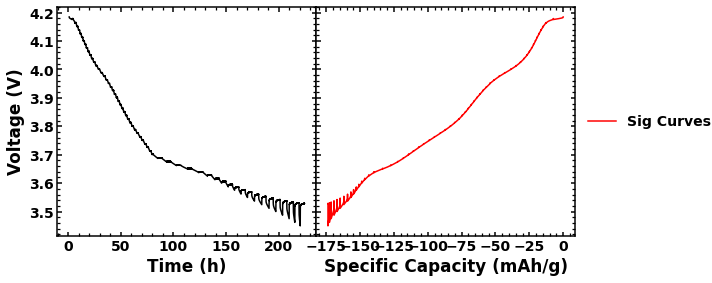

In [21]:
amidr_data.plot_protocol()

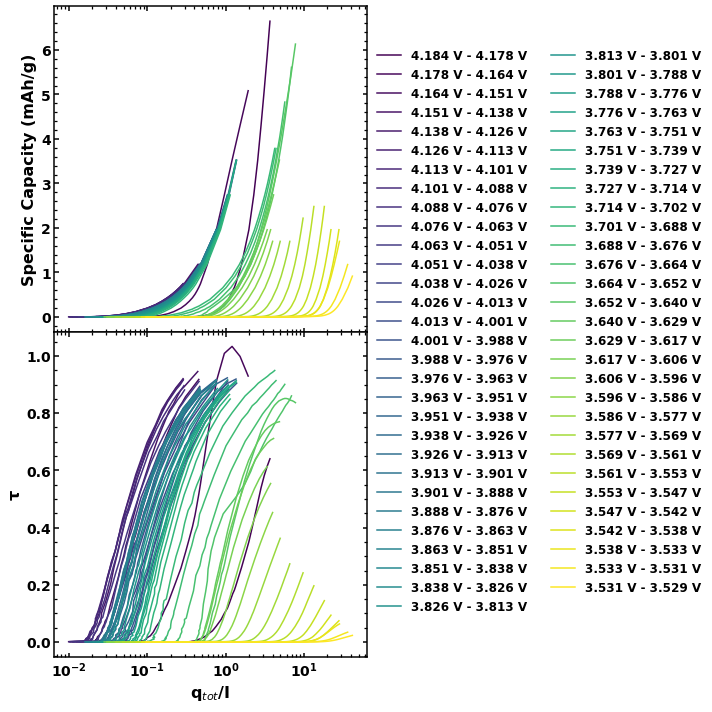

In [22]:
amidr_data.plot_caps()

### Data Fitting 
If your data has been correctly parsed, it is now time to fit it to calculate diffusivity (and potentially resistance). Take care when selecting your arguments as this step can take some time.

> **r**: The particle radius in cm. It is recommended to calculate this by measuring individual particles in SEM images and then take the mass-weighted geometric mean.

> **r_corr**: Whether the data is being fit to an AMIDR *(True)* or AMID *(False)* model. AMIDR's model includes resistance as a source of impedance and will return both diffusivity and resistance values. AMID data can be fit to the AMIDR model, but this is not recommended as this will amplify systematic error in AMID's multi-rate protocol. AMIDR data can also be fit to AMID's model but this is not recommended as this allows resistance to be falsely measured as diffusivity.

> **tracer_inputs**: A list of the necessary additional inputs to calculate $D_t$. The three inputs are: <br> 
-The theoretical max capacity of a completely saturated and desaturated active material in mAh/g <br> 
-The capacity at the beginning of the dataset being measured in mAh/g <br> 
-The temperature in K <br>
The capacity at the beginning of the dataset is best estimated by comparing the starting voltage to the capacity acheived at that voltage during the formation cycle. This helps to correct for side reactions. A large error in the capacity values will only contribute to a very small error in the calculated $D_t$ unless if pulses are applied to active material near a completely saturated or desaturated state. If left empty, $D_t$ will simply not be calculated. <br> *e.g., tracer_inputs = [275.5, 230, 303.15]*

> **export_fig**: Whether or not to save figures comparing theory to fitted values for each pulse/interval. <br> *Default is True*

> **export_data**: Whether or not to save $D_c$ and other values of merit as a spreadsheet. <br> *Default is True*

> **label**: An additional label to append to the cell_label on the figures and exported file names. This can be helpful for comparing different fitting settings upon the same dataset. Changing the label allows for the fitting to generate files to same directory without overwriting the last fitting.

#### [Optional Arguments (Advanced)](#Data-Fitting-Optional-Arguments:)

In [58]:
radius = 1.461e-4 #Zhenhua NM9505
#radius = 0.784e-4 #NMC640
#radius = 1.736e-4 #NMC811
label = ''
fit_data = amidr_data.fit_atlung(radius, r_corr=True, tracer_inputs = [275.5, 230, 303.15], label=label)

Optimum Parameters: Log(Dc) Log(Reff) Log(Reff/Dc)
4.184 V - 4.178 V: [ 10.764  -1.773 -12.538]
4.178 V - 4.164 V: [ 10.117  -1.463 -11.58 ]
4.164 V - 4.151 V: [  9.578  -1.221 -10.8  ]
4.151 V - 4.138 V: [  9.515  -1.159 -10.675]
4.138 V - 4.126 V: [  9.45  -1.11 -10.56]
4.126 V - 4.113 V: [  9.394  -1.151 -10.546]
4.113 V - 4.101 V: [  9.373  -1.208 -10.581]
4.101 V - 4.088 V: [  9.378  -1.216 -10.594]
4.088 V - 4.076 V: [  9.403  -1.228 -10.631]
4.076 V - 4.063 V: [  9.438  -1.285 -10.723]
4.063 V - 4.051 V: [  9.519  -1.214 -10.733]
4.051 V - 4.038 V: [  9.585  -1.264 -10.849]
4.038 V - 4.026 V: [  9.633  -1.306 -10.939]
4.026 V - 4.013 V: [  9.747  -1.31  -11.057]
4.013 V - 4.001 V: [  9.829  -1.315 -11.144]
4.001 V - 3.988 V: [  9.893  -1.259 -11.152]
3.988 V - 3.976 V: [  9.878  -1.186 -11.063]
3.976 V - 3.963 V: [  9.822  -1.119 -10.941]
3.963 V - 3.951 V: [  9.735  -1.15  -10.885]
3.951 V - 3.938 V: [  9.688  -1.13  -10.818]
3.938 V - 3.926 V: [  9.653  -1.148 -10.801]
3.926 V

### Summary Graph

Check the summary graph of your fits to visualize results quickly and to ensure your data was fit correctly.

> **fit_data**: The results of the data fitting that must be passed to the Summary Graph

> **export_fig**: Whether or not to save the summary graph. <br> *Default is True*

> **label**: An additional label to append to the cell_label for the exported file names. It is strongly recommended to use the same label given in the data fitting.

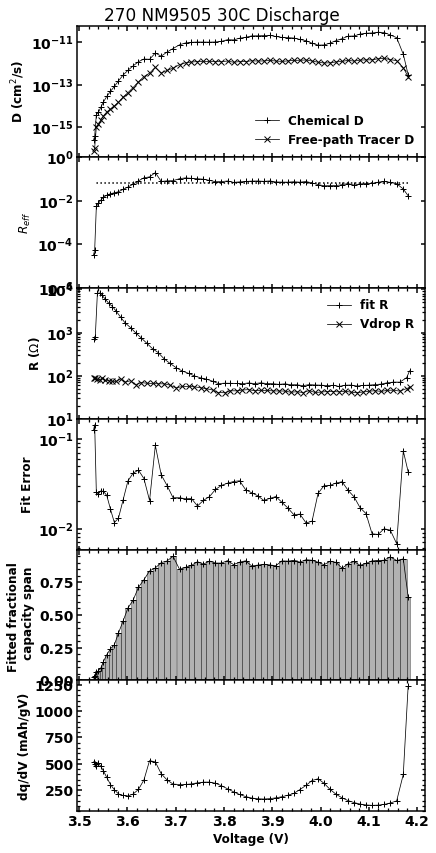

In [54]:
amidr_data.make_summary_graph(fit_data=fit_data, label=label)

#### The AMIDR/AMID Object (Optional Arguments):

>**use_input_cap**: Whether to use the capacity on the file label or to use the total capacity elapsed in the file to calculate rates for labelling. This only impacts pre-fitting outputs and is irrelevant for calculating Diffusivity and Resistance. <br> *Default is True*

>**spliced**: Whether to properly read step numbers for AMID files that have been manually spliced together due to the test having to be restarted on account of power failure or other reasons. Not available for AMIDR. <br> *Default is False*

>**fcap_min**: A fractional value for the lower limit of fcap (τ) allowed to be considered in curve fitting. Adjusting this may assist with fitting when double layer capacitance is a large part of the total capacity for some pulses/intervals, but is not recommended. If adjusting this, it is recommended to use a different cell_label. <br> *Default is 0.0*

>**capacitance_corr**: Whether to enable additional processing to neglect the capacity of the double layer capacitance when calculating fcap (τ). Ohmic resistance and double layer are estimated from the lowest voltage pulse (only available for AMIDR). Enabling this may assist with fitting when double layer capacitance is a large part of the total capacity for some pulses/intervals, but the correction is imperfect and is not recommended. If enabling this, it is recommended to use a different cell_label. <br> *Default is False*

>**force2e**: Whether or not to include counter electrode impedance and force a 3 electrode cell to be analyzed as if it was 2 electrodes. This is ignored if no 3 electrode data is detected. If enabling this, it is recommended to use a different cell_label. <br> *Default is False*

#### Data Fitting (Optional Arguments):

> **D_bounds**: Bounds for $D_c$. Results can be somewhat outside these bounds if using AMIDR analysis as technically R$_{eff}$ and $R_{eff}$/$D_c$ are being fit to improve fitting accuracy. <br> *Default is [1.0e-17, 1.0e-8]*

> **D_guess**: Initial guess for $D_c$. <br> *Default is 1.0e-13*

> **fcapadj_bounds**: Bounds for the adjustment to the total capacity of an interval for AMID protocol datasets. The cumulative capacity achieved by the final low current pulse used for calculating fcap (τ) is slightly less than the theoretical total capacity. Therefore some positive adjustment is allowed. This is irrelevant for AMIDR analysis. <br> *Default is [1.0, 1.5]*

> **fcapadj_guess**: Initial guess for the adjustment to the total capacity of an interval for AMID protocol datasets. This is irrelevant for AMIDR analysis. <br> *Default is 1.0*

> **R_eff_bounds**: Bounds for $R_{eff}$. This is irrelevant for AMID analysis. <br> *Default is [1.0e-6, 1.0e1]*

> **R_eff_guess**: Initial guess for $D_c$. This is irrelevant for AMID analysis. <br> *Default is 1.0e-2*

> **shape**: Particle geometry being modeled. Currently supports "sphere" and "plane". <br> *Default is "sphere".*

> **nalpha**: The number of expansion coefficients to use in the Atlung expression. <br> *Default is 4000.*

> **nQ** : The number of Q values (on a log scale) to use in the black Atlung model curve for comparing fit quality. <br> *Default is 4000.*